In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as offline
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot
print(pd.__version__)

offline.init_notebook_mode()

0.20.3


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('./datasets/league_games_by_lanes.csv')
df.head(5)

,gameid,pmint_side,pmint_win,pmint_count,pmint_summoners,pmint_top,pmint_jungle,pmint_mid,pmint_adc,pmint_support,...,pmint_top_summonerName,pmint_jungle_summonerName,pmint_mid_summonerName,pmint_adc_summonerName,pmint_support_summonerName,opponent_top_summonerName,opponent_jungle_summonerName,oppponent_mid.1,opponent_adc.1,opponent_support.1
0,2668744520,100,False,5,"[AgileOverlord, Baaby Wipes , BokuWaHenry, Cha...",Gangplank,Kayn,Zed,Miss Fortune,Morgana,...,jokokoloko,BokuWaHenry,Baaby Wipes,ChapJae,AgileOverlord,WhytFang,SummonerLamb,FateCatLover,SpudRaRa,Rojayx3
1,2636152431,100,False,1,[BokuWaHenry],Yasuo,Trundle,Zed,Draven,Poppy,...,C9 Bucket,BokuWaHenry,Daww,Big Chief Billy,PotatoPercentage,Azìr,TehH4nkV3nture,Spártan,Puddintot,Jinxless
2,2647387351,100,True,4,"[AgileOverlord, BokuWaHenry, dstrawyer28, joko...",Fiddlesticks,Graves,Vel'Koz,Miss Fortune,Taric,...,EstebanElGuapo,AgileOverlord,dstrawyer28,BokuWaHenry,jokokoloko,FittimeC4,MacAttackmofuka,awstgawstg,MLNC,ChickenLegCanFly
3,2663419678,200,True,5,"[AgileOverlord, Baaby Wipes , BokuWaHenry, Cha...",Sion,Elise,Thresh,Ashe,Teemo,...,ChapJae,dstrawyer28,Baaby Wipes,AgileOverlord,BokuWaHenry,Stéfan,lDevin,Khrystetic,BloodRageBattle,Enx684
4,2625933188,200,False,4,"[AgileOverlord, Baaby Wipes , Skeevo, jokokoloko]",Cho'Gath,Lee Sin,Orianna,Twitch,Taric,...,AgileOverlord,Baaby Wipes,Twisted Skyline,Skeevo,jokokoloko,DrCrisisII,RoxyLalonde116,psychopath66,Hook Me Senpai,MysticHearte


In [28]:
pmint_summoners = [
    'Baaby Wipes ', 
    'Skeevo', 
    'dstrawyer28', 
    'Sheldor', 
    'Archadium', 
    'BokuWaHenry', 
    'AgileOverlord', 
    'jokokoloko', 
    'ChapJae', 
    'Channsanity', 
    'Rudo',
    'cyrst0lpeTe',
    'Onishfu'
]
game_limit = 5

# What is the collective experience of the Top Champion Pool

In [29]:
games_with_pmint_top = df[df['pmint_top_summonerName'].isin(pmint_summoners)]
games_top = games_with_pmint_top.groupby(['pmint_top_summonerName', 'pmint_top']).filter(lambda x: len(x) >= game_limit)

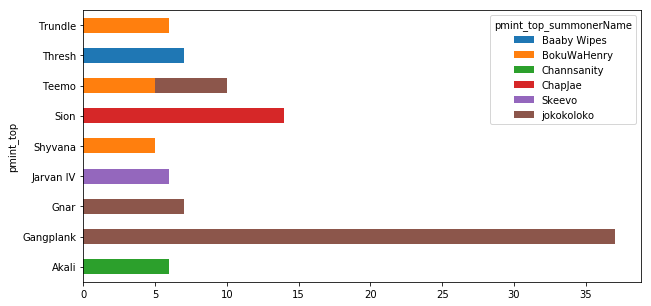

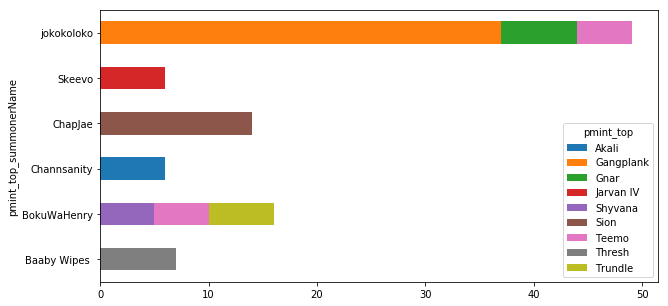

In [30]:
games_top.groupby(['pmint_top', 'pmint_top_summonerName']).size().unstack().plot.barh(figsize=(10,5), stacked=True)
games_top.groupby(['pmint_top_summonerName', 'pmint_top']).size().unstack().plot.barh(figsize=(10,5), stacked=True)

# What is the collective experience of the Jungle Champion Pool

In [31]:
games_with_pmint_jungle = df[df['pmint_jungle_summonerName'].isin(pmint_summoners)]
games_jungle = games_with_pmint_jungle.groupby(['pmint_jungle_summonerName', 'pmint_jungle']).filter(lambda x: len(x) >= game_limit)

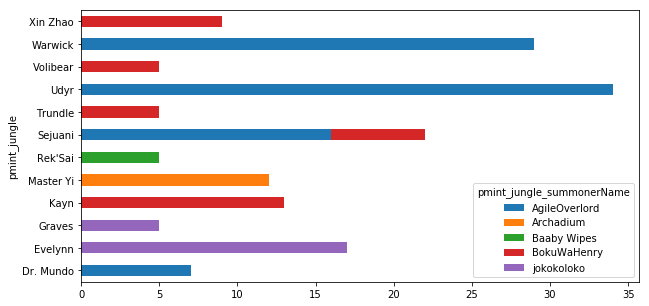

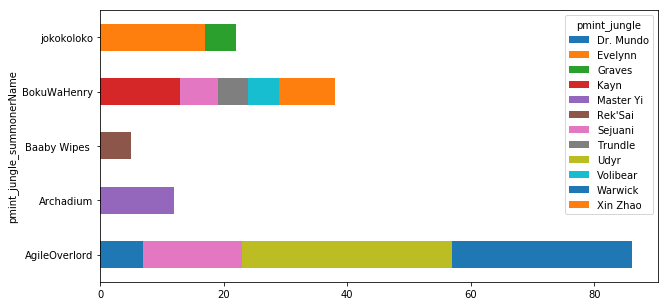

In [32]:
games_jungle.groupby(['pmint_jungle', 'pmint_jungle_summonerName']).size().unstack().plot.barh(figsize=(10,5), stacked=True)
games_jungle.groupby(['pmint_jungle_summonerName', 'pmint_jungle']).size().unstack().plot.barh(figsize=(10,5), stacked=True)

# What is the collective experience of the Mid Champion Pool

In [33]:
games_with_pmint_mid = df[df['pmint_mid_summonerName'].isin(pmint_summoners)]
games_mid = games_with_pmint_mid.groupby(['pmint_mid_summonerName', 'pmint_mid']).filter(lambda x: len(x) >= game_limit)

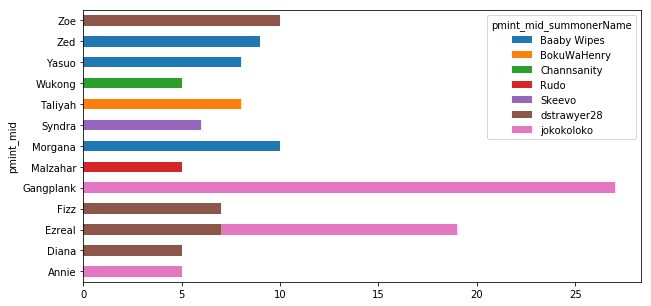

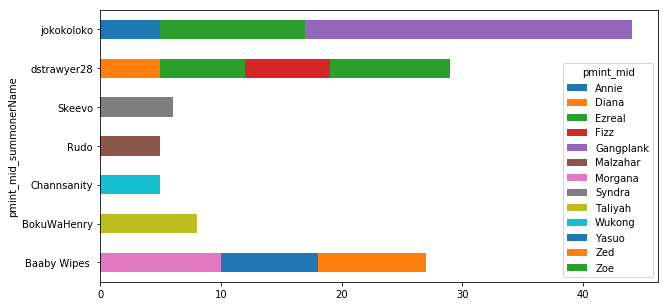

In [34]:
games_mid.groupby(['pmint_mid', 'pmint_mid_summonerName']).size().unstack().plot.barh(figsize=(10,5), stacked=True)
games_mid.groupby(['pmint_mid_summonerName', 'pmint_mid']).size().unstack().plot.barh(figsize=(10,5), stacked=True)

# What is the collective experience of the ADC Champion Pool

In [35]:
games_with_pmint_adc = df[df['pmint_adc_summonerName'].isin(pmint_summoners)]
games_adc = games_with_pmint_adc.groupby(['pmint_adc_summonerName', 'pmint_adc']).filter(lambda x: len(x) >= game_limit)

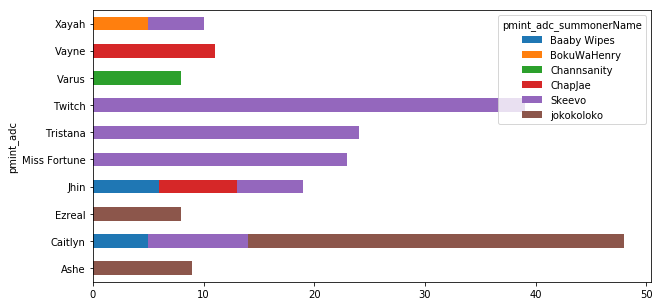

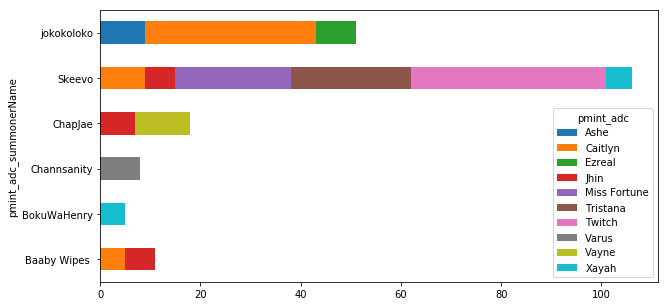

In [36]:
games_adc.groupby(['pmint_adc', 'pmint_adc_summonerName']).size().unstack().plot.barh(figsize=(10,5), stacked=True)
games_adc.groupby(['pmint_adc_summonerName', 'pmint_adc']).size().unstack().plot.barh(figsize=(10,5), stacked=True)

# What is the collective experience of the Support Champion Pool

In [37]:
games_with_pmint_support = df[df['pmint_support_summonerName'].isin(pmint_summoners)]
games_support = games_with_pmint_support.groupby(['pmint_support_summonerName', 'pmint_support']).filter(lambda x: len(x) >= game_limit)

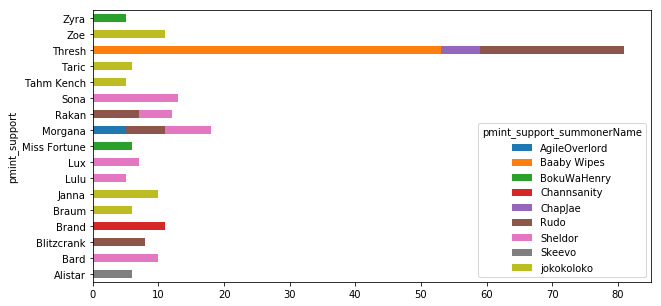

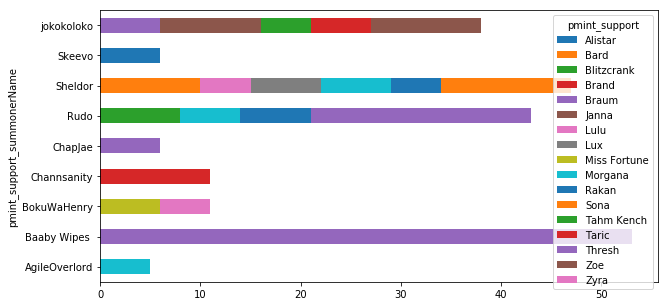

In [38]:
games_support.groupby(['pmint_support', 'pmint_support_summonerName']).size().unstack().plot.barh(figsize=(10,5), stacked=True)
games_support.groupby(['pmint_support_summonerName', 'pmint_support']).size().unstack().plot.barh(figsize=(10,5), stacked=True)